In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:

data = pd.read_csv("Train_data.csv")

print("✅ Dataset Loaded Successfully!")
print("\n🔹 Dataset Shape:", data.shape)
print("\n🔹 Columns:\n", data.columns.tolist())
print("\n🔹 First 5 Rows:\n")
display(data.head())


✅ Dataset Loaded Successfully!

🔹 Dataset Shape: (25192, 42)

🔹 Columns:
 ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']

🔹 First 5 Rows:



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:

target_col = 'class'

X = data.drop(columns=[target_col])
y = data[target_col]

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target if it’s categorical
if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

# Check encoded data
print("✅ Encoding done successfully!")
print("\n🔹 Features shape:", X.shape)
print("🔹 Target classes:", np.unique(y))


✅ Encoding done successfully!

🔹 Features shape: (25192, 41)
🔹 Target classes: [0 1]


In [4]:
# ===  Split Data & Scale ===

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data split and scaling completed!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


✅ Data split and scaling completed!
Training samples: 20153, Testing samples: 5039


In [5]:
# === Cell 5: Model Training ===

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("✅ Random Forest Model Trained Successfully!")


✅ Random Forest Model Trained Successfully!


✅ RandomForest Accuracy: 99.74%

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2349
           1       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



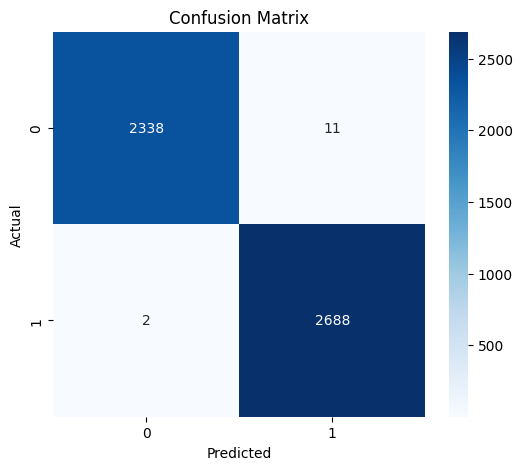

In [6]:
# === Cell 6: Evaluation ===

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ RandomForest Accuracy: {accuracy * 100:.2f}%\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
import joblib

# Save model parts
joblib.dump(rf_model, "nids_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoders, "encoders.pkl")
joblib.dump(target_encoder, "target_encoder.pkl")

# Save training column order
joblib.dump(X.columns.tolist(), "train_columns.pkl")

print("✅ Model and preprocessing objects saved successfully.")


✅ Model and preprocessing objects saved successfully.


In [12]:
# === Corrected Gradio UI for Manual Testing ===
import gradio as gr
import pandas as pd
import numpy as np
import joblib

# Load trained model and preprocessing objects
model = joblib.load("nids_rf_model.pkl")
scaler = joblib.load("scaler.pkl")
encoders = joblib.load("encoders.pkl")
target_encoder = joblib.load("target_encoder.pkl")
train_columns = joblib.load("train_columns.pkl")

# Ensure all categorical columns exist
categorical_cols = ['protocol_type', 'service', 'flag']
numeric_cols = [col for col in train_columns if col not in categorical_cols]

# --- Fix: populate categorical classes correctly ---
for col in categorical_cols:
    if col not in encoders:
        raise ValueError(f"Missing encoder for column: {col}")

# --- Prediction Function ---
def predict_intrusion(*args):
    try:
        # Build dataframe from inputs
        input_dict = dict(zip(train_columns, args))
        df = pd.DataFrame([input_dict])

        # Encode categorical columns
        for col in categorical_cols:
            le = encoders[col]
            if df[col][0] not in le.classes_:
                df[col] = le.classes_[0]
            df[col] = le.transform(df[col])

        # Scale numeric columns
        df[numeric_cols] = scaler.transform(df[numeric_cols])

        # Predict
        pred = model.predict(df)[0]
        pred_label = target_encoder.inverse_transform([pred])[0]
        return f"✅ Prediction: {pred_label}"

    except Exception as e:
        return f"❌ Error: {str(e)}"


# --- Build Input UI Dynamically ---
inputs = []
for col in train_columns:
    if col in categorical_cols:
        inputs.append(gr.Dropdown(choices=list(encoders[col].classes_), label=col))
    else:
        inputs.append(gr.Number(label=col))

# --- Launch Interface ---
iface = gr.Interface(
    fn=predict_intrusion,
    inputs=inputs,
    outputs="text",
    title="🔍 Network Intrusion Detection System (NIDS)",
    description="Enter all network traffic features to predict whether the connection is Normal or an Attack"
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://79bb66bb8c276f7920.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
